In [1]:
import sys

In [2]:
# this step is for myself; usually unnecessary for others
sys.path.pop(1)
sys.path.pop(-1)

'/home/changgoo/yt-changgoo'

# custom YT installation

To read tarred vtk files from TIGRESS-NCR simulations using yt, you need my custom version of yt at 
https://github.com/changgoo/yt

After cloning the source, you need usual yt installation step at https://yt-project.org/docs/dev/installing.html#building-from-source

In [3]:
sys.path.insert(0,'/home/changgoo/yt-changgoo/')

In [4]:
sys.path.insert(0,'/home/changgoo/pyathena_master/')

In [5]:
import yt

In [6]:
from pyathena.fields.ytfields import *

[1691777898.741975] [stellar-vis1:2077019:0]         ib_mlx5.h:870  UCX  ERROR mlx5dv_devx_umem_reg() failed: Cannot allocate memory : Please set max locked memory (ulimit -l) to 'unlimited' (current: 64 kbytes)


[stellar-vis1.princeton.edu:2077019] mca_base_component_repository_open: unable to open mca_op_avx: /usr/local/openmpi/4.1.0/gcc/lib64/openmpi/mca_op_avx.so: undefined symbol: ompi_op_base_module_t_class (ignored)
[stellar-vis1.princeton.edu:2077019] pml_ucx.c:273  Error: Failed to create UCP worker


In [7]:
import pyathena as pa

In [8]:
# s = pa.LoadSimTIGRESSNCR('/scratch/gpfs/changgoo/TIGRESS-NCR/LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8/')
# s = pa.LoadSimTIGRESSNCR('/scratch/gpfs/changgoo/TIGRESS-NCRSP/R8_8pc_NCRSP.full.y2.xy1024.eps0.np768.has/')
# s = pa.LoadSimTIGRESSNCR('/projects/EOSTRIKE/TIGRESS-NCR/LGR4_4pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8/')
# s = pa.LoadSimTIGRESSNCR('/projects/EOSTRIKE/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0/')
# s = pa.LoadSimTIGRESSNCR('/scratch/gpfs/changgoo/TIGRESS-NCRSP/LGR4b_4pc_NCR.full.v3/')
s = pa.LoadSimTIGRESSNCR('/tigress/changgoo/TIGRESS-NCR/R8_4pc_NCR.full.xy2048.eps0.np768.has/')


[LoadSimTIGRESSNCR-WARNING] Vtk file size is not unique.
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [9]:
num = s.nums[282]
print(num)

482


In [10]:
ds = s.ytload(num)
ds = add_fields(s,ds,xray=False)

yt : [INFO     ] 2023-08-11 14:18:22,338 Temporarily setting domain_right_edge = -domain_left_edge. This will be corrected automatically if it is not the case.
yt : [WARNING  ] 2023-08-11 14:18:22,340 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2023-08-11 14:18:22,340 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2023-08-11 14:18:22,341 Overriding time_unit: 0.9777922216807893 Myr.
yt : [INFO     ] 2023-08-11 14:18:22,342 Overriding mass_unit: 0.0346244904274392 Msun.
yt : [INFO     ] 2023-08-11 14:18:22,342 Overriding magnetic_unit: 5.426549446492357e-07 G.
yt : [INFO     ] 2023-08-11 14:18:22,398 Parameters: current_time              = 482.001
yt : [INFO     ] 2023-08-11 14:18:22,399 Parameters: domain_dimensions         = [ 256  256 1536]
yt : [INFO     ] 2023-08-11 14:18:22,400 Parameters: domain_left_edge          = [ -512.  -512. -3072.]
yt : [INFO     ] 2023-08-11 14:18:22,400 Paramete

yt : [INFO     ] 2023-08-11 14:18:23,891 xlim = -512.000000 512.000000
yt : [INFO     ] 2023-08-11 14:18:23,892 ylim = -512.000000 512.000000
yt : [INFO     ] 2023-08-11 14:18:23,895 xlim = -512.000000 512.000000
yt : [INFO     ] 2023-08-11 14:18:23,895 ylim = -512.000000 512.000000
yt : [INFO     ] 2023-08-11 14:18:23,898 Making a fixed resolution buffer of (('gas', 'chi_FUV')) 800 by 800



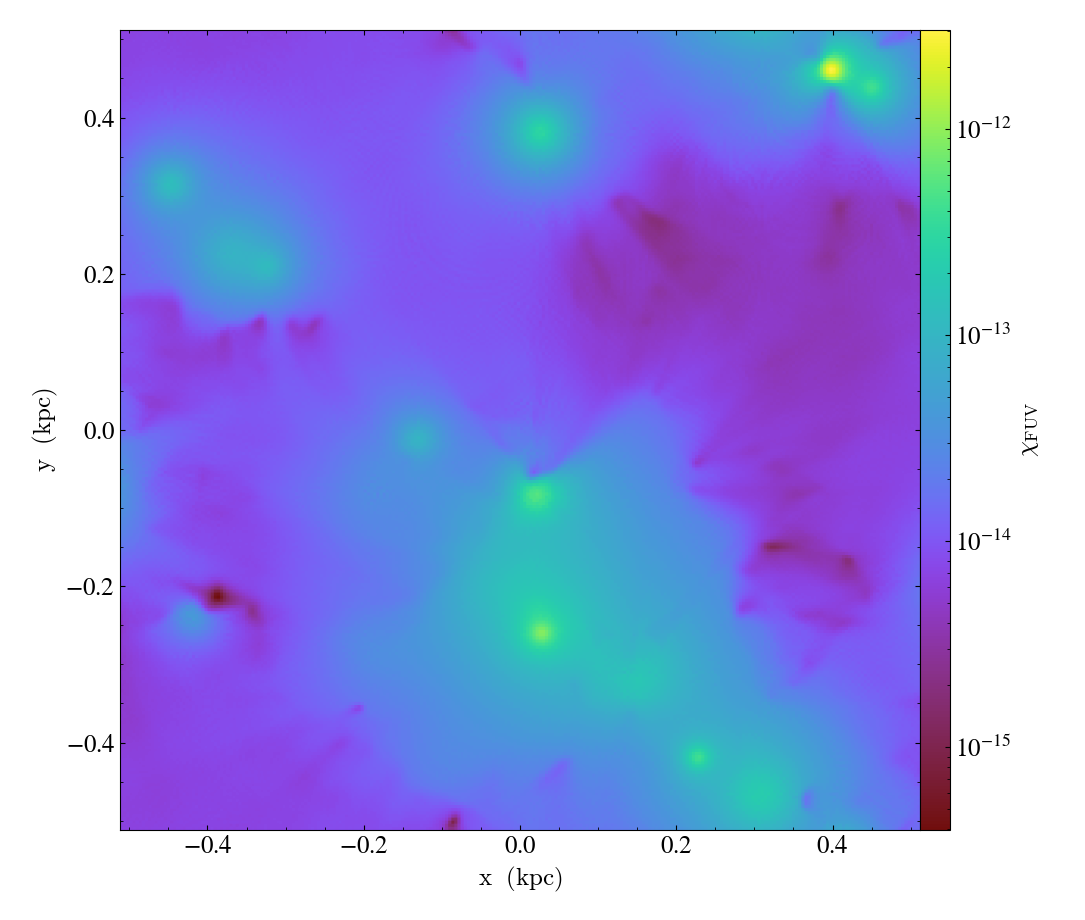

In [11]:
yt.SlicePlot(ds,'z','chi_FUV')

In [12]:
from pyathena.volume.volume import *

In [18]:
f = ("gas","radiation_energy_density_LyC")
c = 'kelp'
b = (1.e-18,1.e-12)
im, tf, sc = render_volume(ds, f, b, c, render=True)

yt : [INFO     ] 2023-08-11 14:20:53,648 Rendering scene (Can take a while).
yt : [INFO     ] 2023-08-11 14:20:53,654 Creating volume


file saved: None


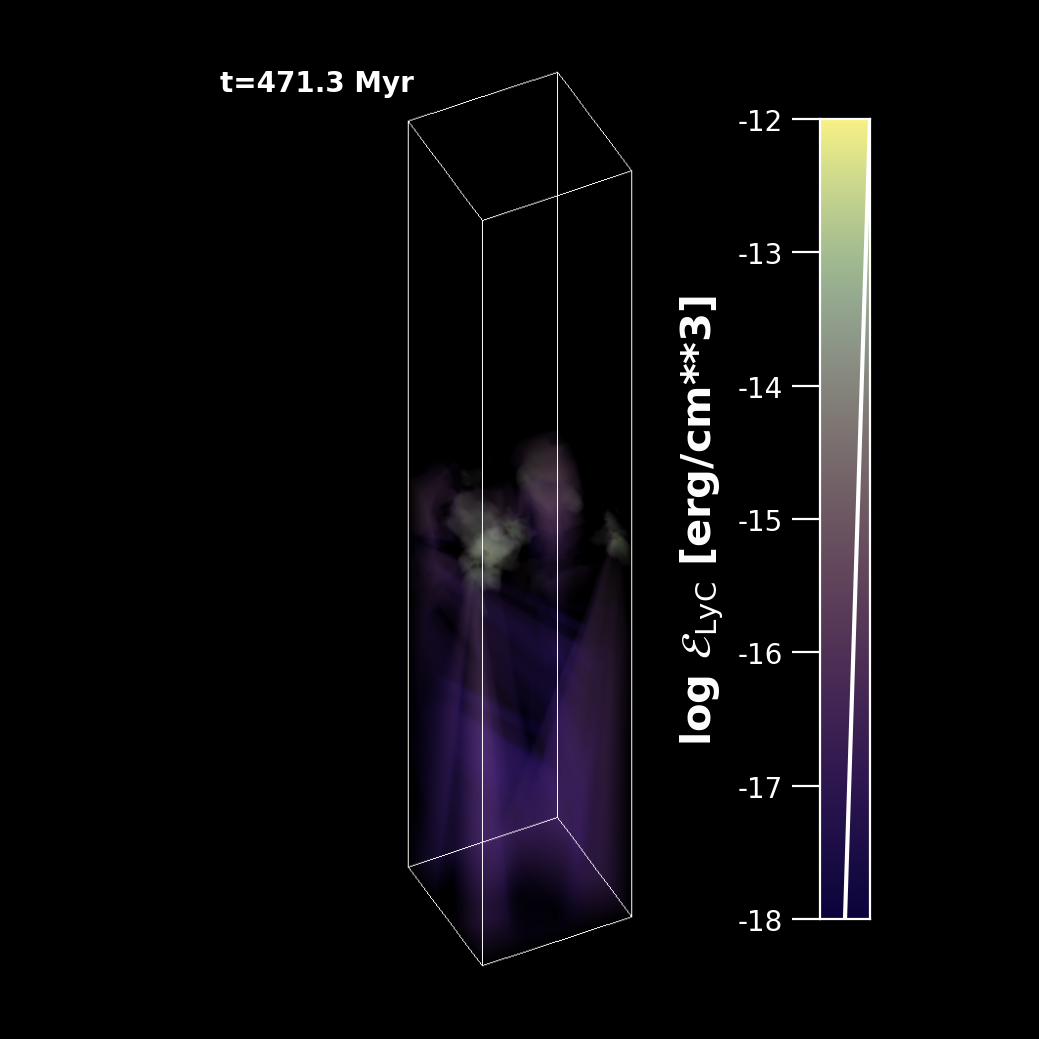

In [19]:
with plt.style.context("dark_background"):
    fig = save_with_tf(ds, f, im, tf, xoff=0.2)

In [22]:
f = ("gas","radiation_energy_density_FUV")
c = 'kelp'
b = (1.e-15,1.e-11)
im, tf, sc = render_volume(ds, f, b, c, render=True)

yt : [INFO     ] 2023-08-11 14:22:30,636 Rendering scene (Can take a while).
yt : [INFO     ] 2023-08-11 14:22:30,640 Creating volume


file saved: None


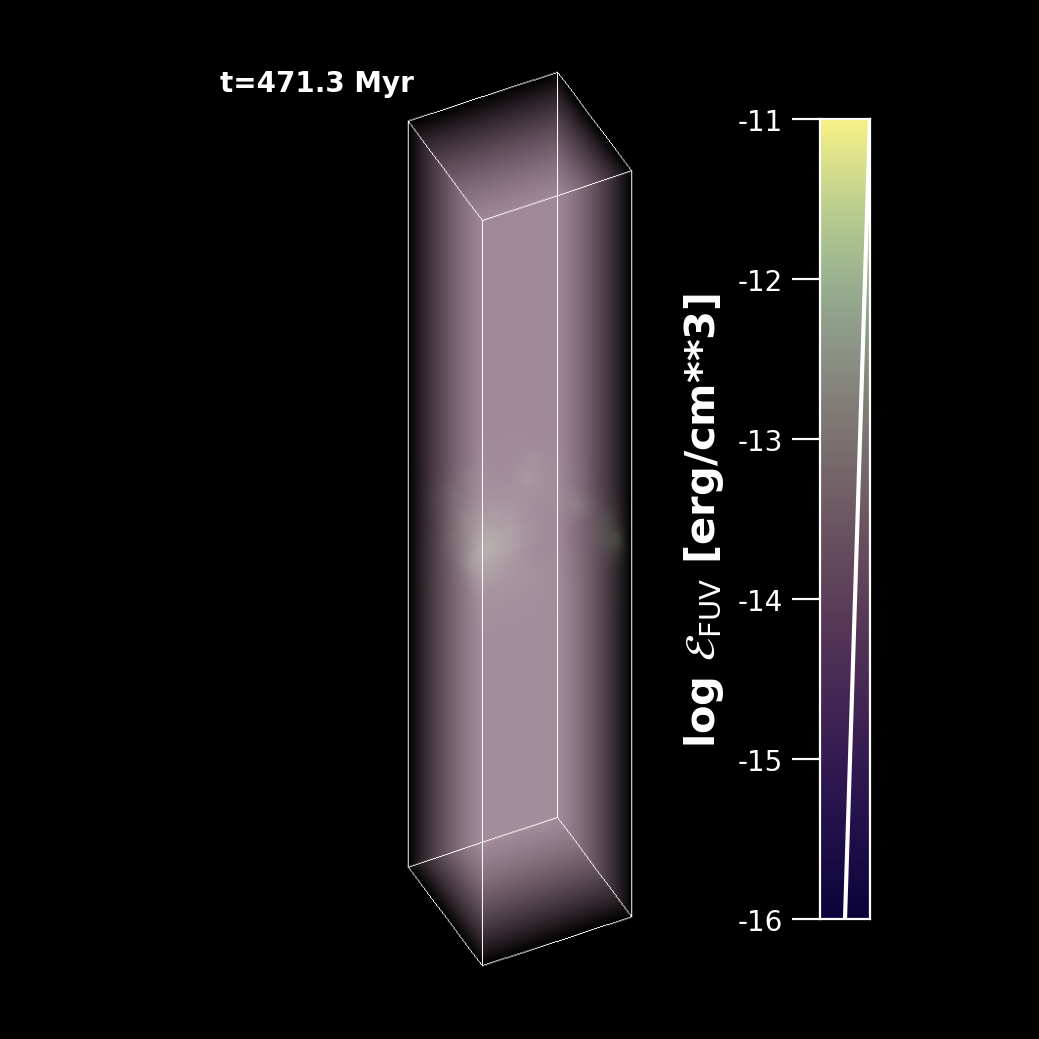

In [21]:
with plt.style.context("dark_background"):
    fig = save_with_tf(ds, f, im, tf, xoff=0.2)

yt : [INFO     ] 2023-08-11 14:31:44,661 Rendering scene (Can take a while).
yt : [INFO     ] 2023-08-11 14:31:44,665 Creating volume
yt : [INFO     ] 2023-08-11 14:32:08,774 Rendering scene (Can take a while).
yt : [INFO     ] 2023-08-11 14:32:08,778 Creating volume


file saved: /tigress/changgoo/TIGRESS-NCR/R8_4pc_NCR.full.xy2048.eps0.np768.has/volume/H_nuclei_density_linramp_time_0482.png


yt : [INFO     ] 2023-08-11 14:32:32,641 Rendering scene (Can take a while).
yt : [INFO     ] 2023-08-11 14:32:32,645 Creating volume


file saved: /tigress/changgoo/TIGRESS-NCR/R8_4pc_NCR.full.xy2048.eps0.np768.has/volume/H_p0_number_density_linramp_time_0482.png


yt : [INFO     ] 2023-08-11 14:32:56,689 Rendering scene (Can take a while).
yt : [INFO     ] 2023-08-11 14:32:56,693 Creating volume


file saved: /tigress/changgoo/TIGRESS-NCR/R8_4pc_NCR.full.xy2048.eps0.np768.has/volume/H_p1_number_density_linramp_time_0482.png
file saved: /tigress/changgoo/TIGRESS-NCR/R8_4pc_NCR.full.xy2048.eps0.np768.has/volume/H2_number_density_linramp_time_0482.png


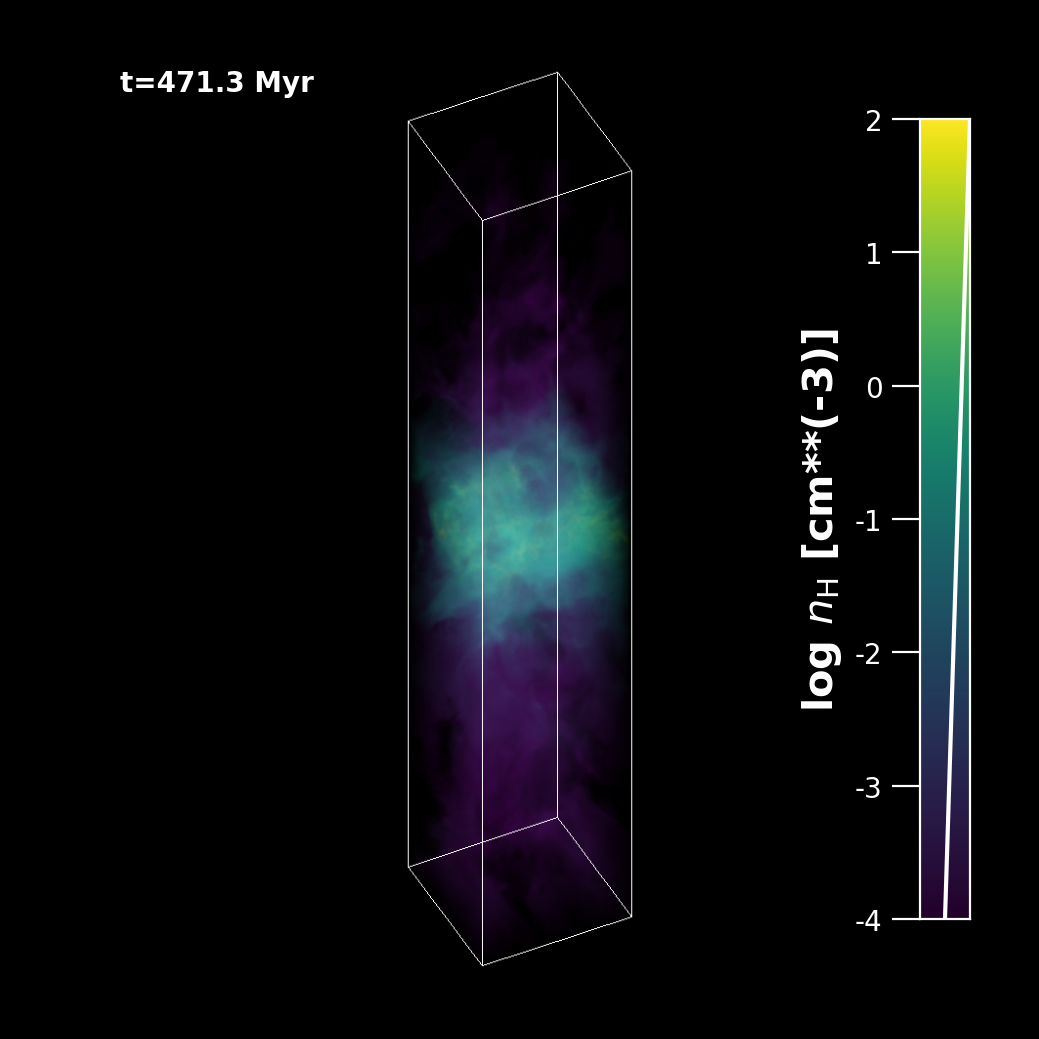

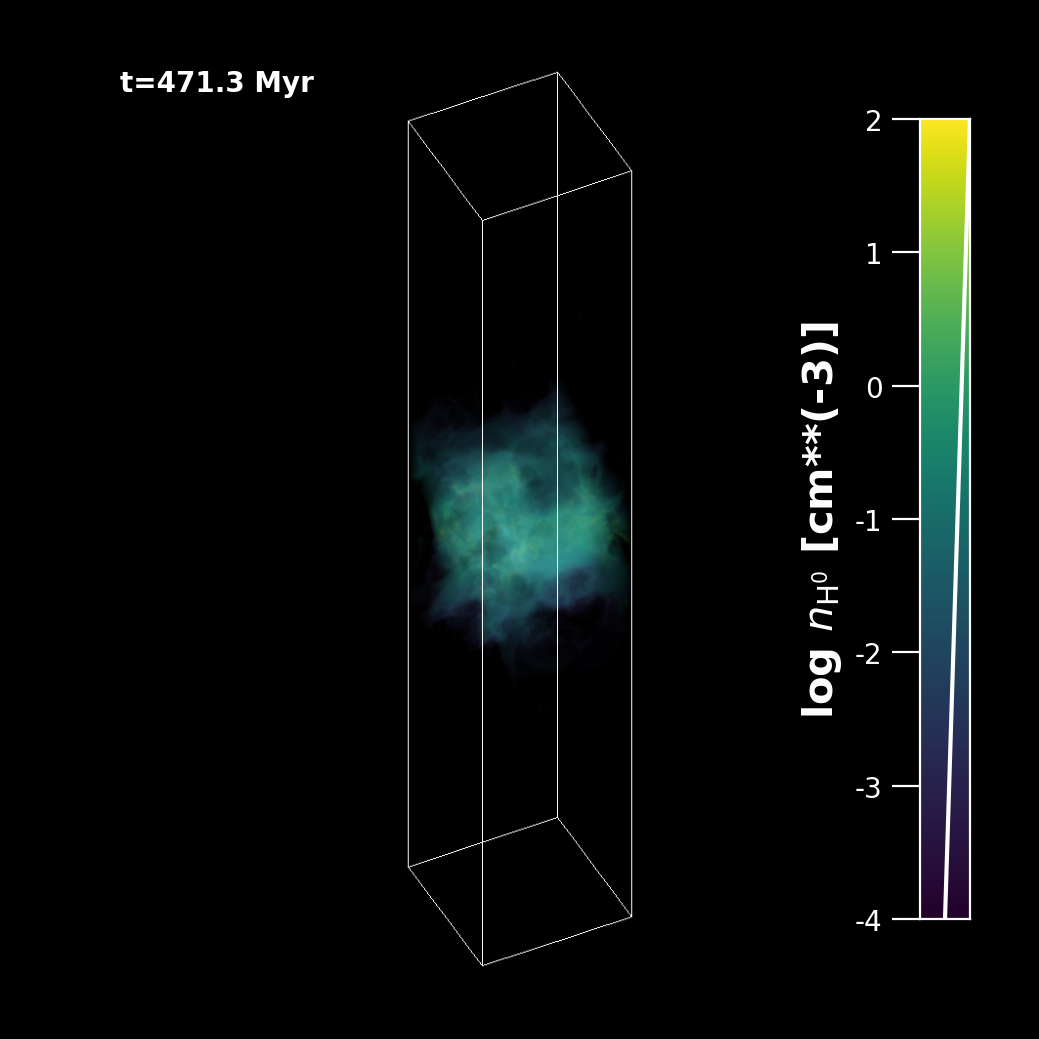

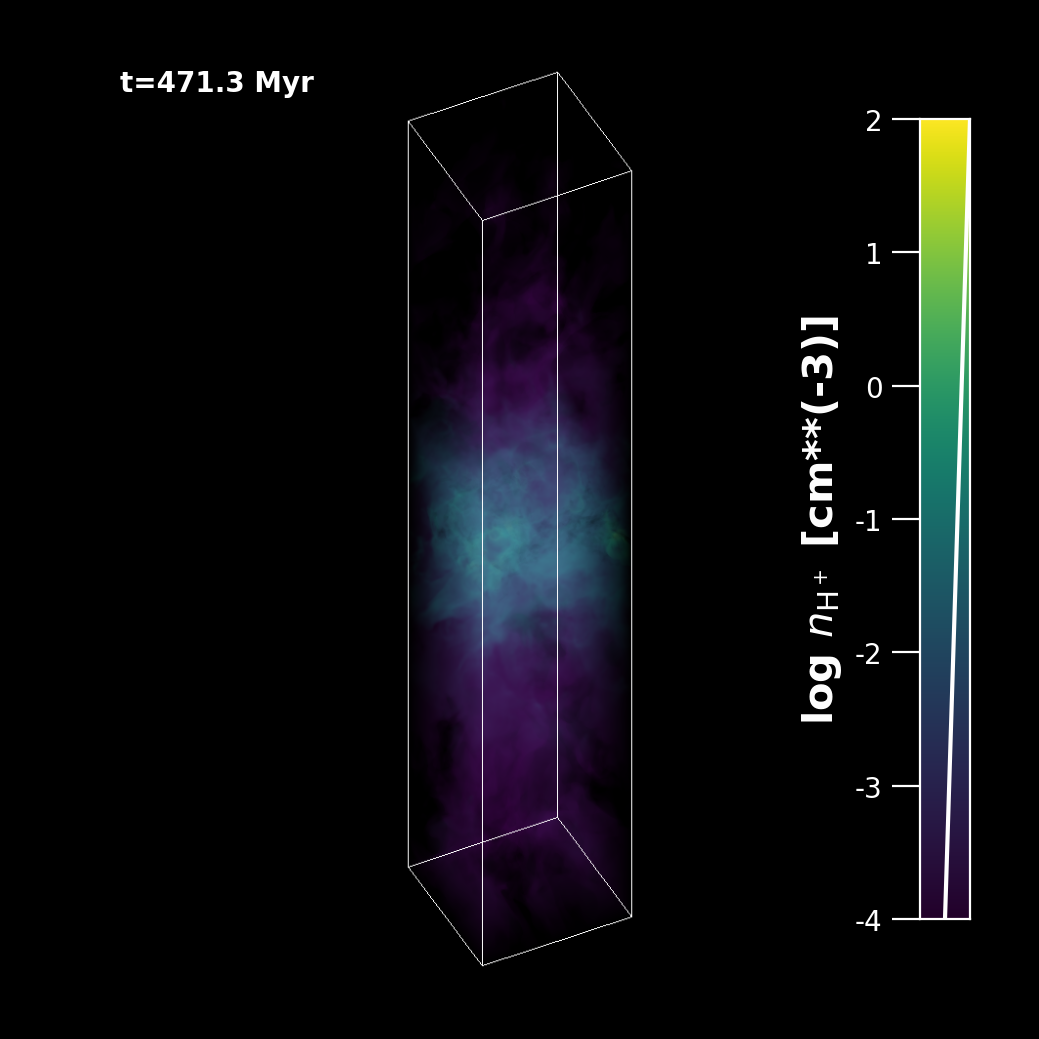

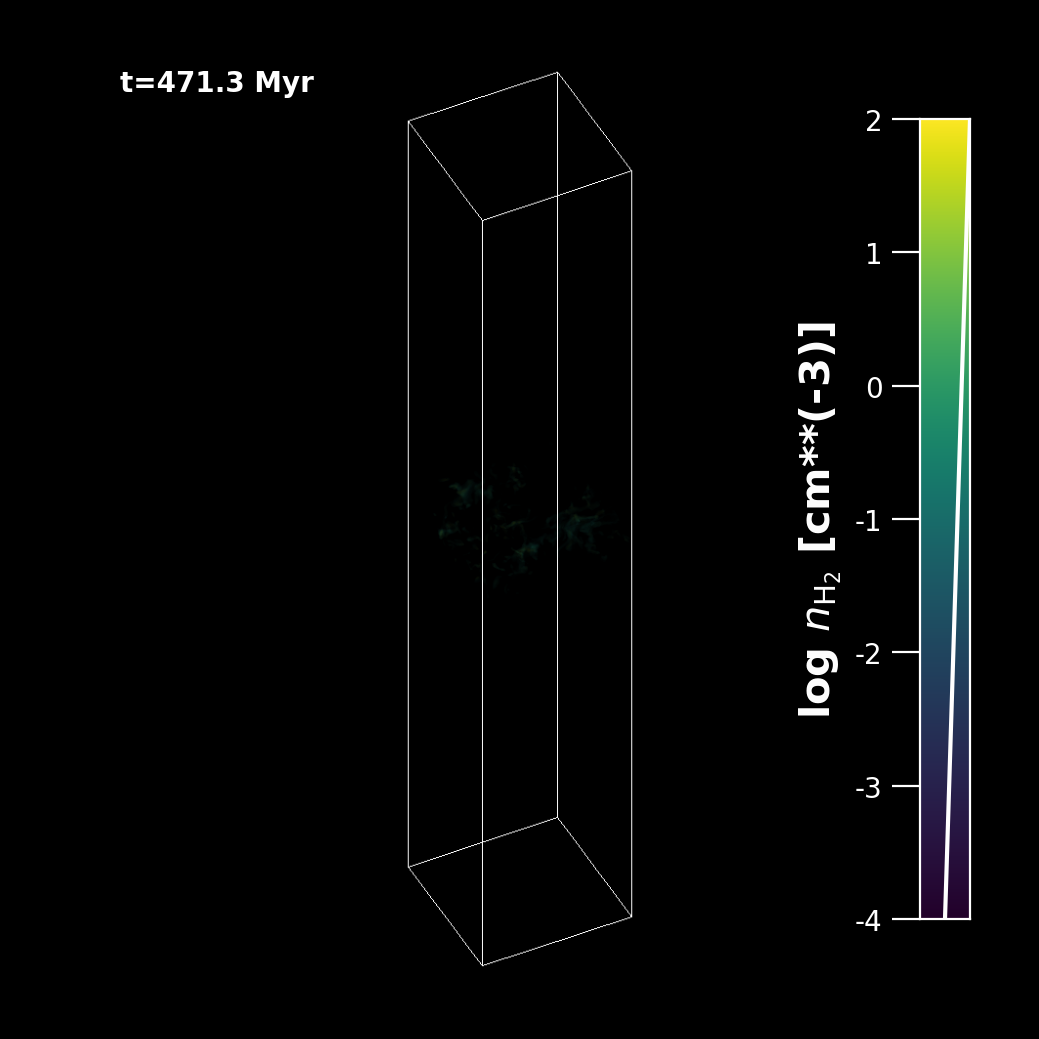

In [31]:
import os
import os.path as osp
# create all density volume rendering
foutdir = osp.join(os.fspath(s.basedir), "volume")
os.makedirs(foutdir, exist_ok=True)

fields = [
        ("gas", "H_nuclei_density"),
        ("gas", "H_p0_number_density"),
        ("gas", "H_p1_number_density"),
        ("gas", "H2_number_density"),
]
bounds = [
    (1.0e-4, 1.0e2),
    (1.0e-4, 1.0e2),
    (1.0e-4, 1.0e2),
    (1.0e-4, 1.0e2),
]
cmaps = [
    "viridis",
    "viridis",
    "viridis",
    "viridis",
]

with plt.style.context("dark_background"):
    for f, b, c in zip(fields, bounds, cmaps):
        im, tf, sc = render_volume(ds, f, b, c, nlayer=0)
        fout = osp.join(
            foutdir,
            f"{f[1].replace('[','').replace(']','')}_linramp_time_{num:04d}.png",
        )
        save_with_tf(ds, f, im, tf, fout=fout, xoff=0.1)

        ## optional rendering with layers
        # im, tf, sc = render_volume(ds, f, b, c, nlayer=7)
        # fout = osp.join(
        #     foutdir, f"{f[1].replace('[','').replace(']','')}_time_{num:04d}.png"
        # )
        # save_with_tf(ds, f, im, tf, fout=fout, xoff=xoff)


In [32]:
#example of stitching density outputs
def get_time_from_zprof(s, inum):
    zpf = glob.glob(os.path.join(s.basedir, "zprof/", f"*.{inum:04d}.whole.zprof"))
    with open(zpf[0], "r") as fp:
        l = fp.readline()
        time = float(l[l.rfind("=") + 1 :])
    return time

def stitch_number_densities(s, i, tf="layer", ncrsp=False):
    fields = [
        "H_nuclei_density",
        "H_p0_number_density",
        "H_p1_number_density",
        "H2_number_density",
    ]
    field_names = ["total", "atomic (H$^0$)", "ionized (H$^+$)", "molecular (H$_2$)"]
    fig_ysize = 10
    if ncrsp:
        main_x1 = 0.25
        main_x2 = 1.3
        sub_x1 = 0.25
        sub_x2 = 0.95
    else:
        Nx, Ny, Nz = s.domain['Nx']
        if Nz/Nx == 6:
            main_x1 = 0.35
            main_x2 = 1
            sub_x1 = 0.35
            sub_x2 = 0.65
        elif Nz/Nx == 3:
            main_x1 = 0.25
            main_x2 = 1
            sub_x1 = 0.25
            sub_x2 = 0.75
        else:
            print(f"Layout for Nz/Nx = {Nz/Nx} is not specified")
    main_dx = main_x2 - main_x1
    sub_dx = sub_x2 - sub_x1
    Nsub = 3
    fig_xsize = fig_ysize*main_dx + fig_ysize*Nsub*sub_dx
    wratios = [main_dx] + [sub_dx]*Nsub
    with plt.style.context("dark_background", {"figure.dpi": 300}):
        fig, axes = plt.subplots(
            1,
            4,
            figsize=(fig_xsize,fig_ysize),
            gridspec_kw=dict(wspace=0, hspace=0, width_ratios=wratios),
        )

        for field, name, ax in zip(fields, field_names, axes.flatten()):
            if tf == "linramp":
                head = f"{field}_linramp"
            else:
                head = field
            files = sorted(
                glob.glob(os.path.join(s.basedir, "volume", f"{head}_time_????.png"))
            )
            inum = int(files[i].split("_")[-1].split(".")[0])
            time = get_time_from_zprof(s, inum)
            plt.sca(ax)
            img = plt.imread(files[i])
            Nx, Ny, Nch = img.shape
            plt.imshow(img)
            plt.annotate(
                name,
                (0.5, 0.0),
                ha="center",
                va="top",
                xycoords="axes fraction",
                weight="bold",
                fontsize="xx-large"
            )
            if name == "total":
                plt.xlim(Nx * main_x1, Nx * main_x2)
            else:
                plt.xlim(Nx * sub_x1, Nx * sub_x2)
            plt.axis("off")
        axes[0].annotate(
            f"t={time*s.u.Myr:5.1f}Myr",
            (0.1, 1.0),
            va="top",
            ha="left",
            xycoords="axes fraction",
            weight="bold",
            fontsize="xx-large",
        )

        fig.savefig(
            os.path.join(
                s.basedir, "volume", f"number_density_{tf}_time_{inum:04d}.png"
            ),
            bbox_inches="tight",
        )


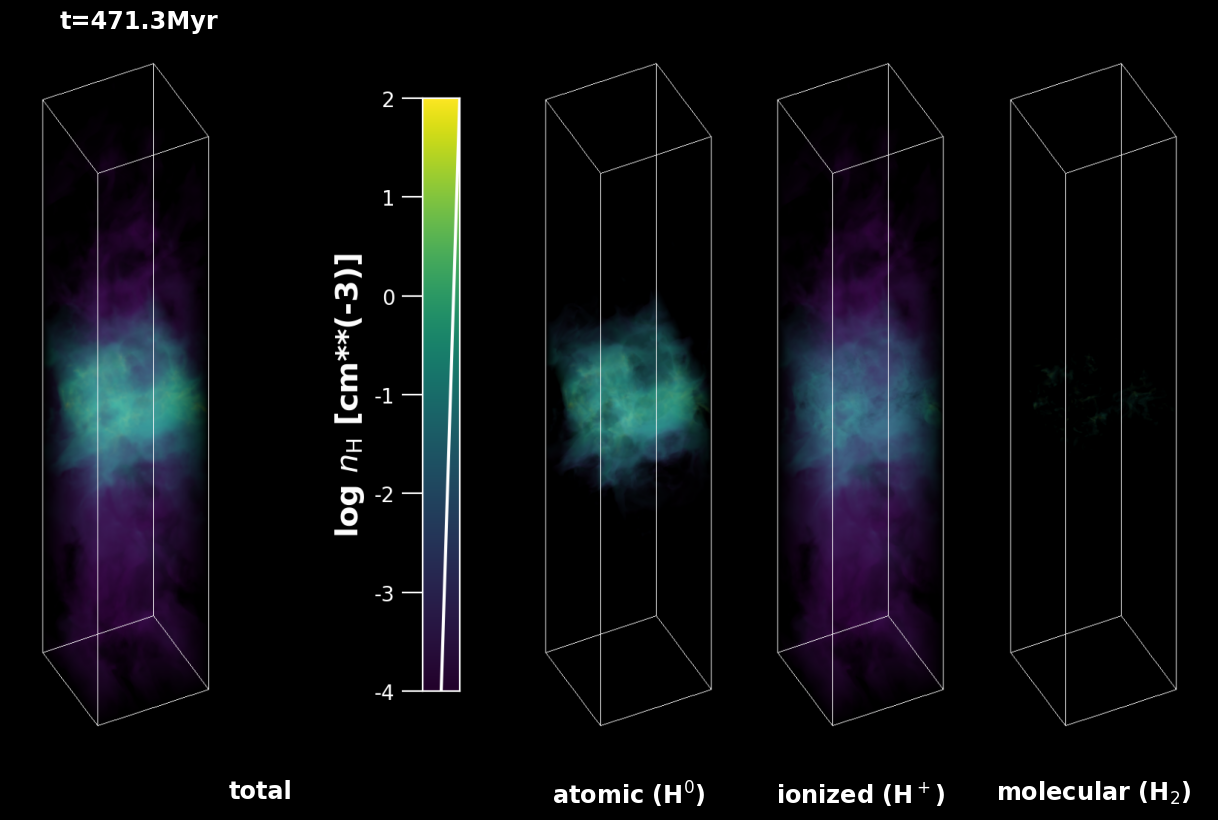

In [33]:
stitch_number_densities(s, 282, tf='linramp')